# Vaidya spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.6.beta5, Release Date: 2022-03-12'

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [2]:
%display latex

## Spacetime

We declare the spacetime manifold $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


We introduce coordinates $(v,r,\theta,\varphi)$ analogous to the **ingoing null Eddington-Finkelstein coordinates** in Schwarzschild spacetime, i.e. such that $v$ is constant along ingoing radial null geodesics:

In [4]:
XN.<v,r,th,ph> = M.chart(r'v r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
XN

Chart (M, (v, r, th, ph))

In [5]:
XN.coord_range()

v: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

### Metric tensor

The metric tensor corresponding to the Vaidya solution is:

In [6]:
m = function('m')
g = M.metric()
g[0,0] = -(1 - 2*m(v)/r)
g[0,1] = 1
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2*m(v)/r - 1) dv⊗dv + dv⊗dr + dr⊗dv + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [7]:
g.inverse().display()

inv_g = ∂/∂v⊗∂/∂r + ∂/∂r⊗∂/∂v + (r - 2*m(v))/r ∂/∂r⊗∂/∂r + r^(-2) ∂/∂th⊗∂/∂th + 1/(r^2*sin(th)^2) ∂/∂ph⊗∂/∂ph

In [8]:
g.inverse()[:]

[                0                 1                 0                 0]
[                1    (r - 2*m(v))/r                 0                 0]
[                0                 0            r^(-2)                 0]
[                0                 0                 0 1/(r^2*sin(th)^2)]

The Ricci tensor is

In [9]:
Ric = g.ricci()
Ric.display()

Ric(g) = 2*d(m)/dv/r^2 dv⊗dv

It has zero trace, i.e. the Ricci scalar vanishes:

In [10]:
g.ricci_scalar().expr()

0

The Kretschmann scalar $K = R_{abcd} R^{abcd}$:

In [11]:
Riem = g.riemann()
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
K.expr()

48*m(v)^2/r^6

### Wave vector $k$

In [12]:
XN.coframe()

Coordinate coframe (M, (dv,dr,dth,dph))

In [13]:
dv = XN.coframe()[0]
dv.display()

dv = dv

In [14]:
k = - dv.up(g)
k.set_name('k')
k.display()

k = -∂/∂r

Check that 𝑘 is a null vector:

In [15]:
g(k, k).expr()

0

Check that $k$ is a geodesic vector field, i.e. fulfils $\nabla_k  k = 0$:

In [16]:
nabla = g.connection()
acc = nabla(k).contract(k)
acc.display()

0

### Ingoing Eddington-Finkelstein coordinates $(t,r,\theta,\varphi)$ 

Let us introduce a new chart $(t,r,\theta,\varphi)$ such that the advanced time $t+r$ is $v$: $v = t + r$; this is the 
analog of **ingoing Eddington-Finkelstein (IEF) coordinates** in Schwarzschild spacetime.

In [17]:
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\varphi:periodic')
X

Chart (M, (t, r, th, ph))

In [18]:
X.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

We declare the transition map between the $(t,r,\theta,\varphi)$ and $(v,r,\theta,\varphi)$ coordinates:

In [19]:
X_to_XN = X.transition_map(XN, (t + r, r, th, ph))
X_to_XN.display()

v = r + t
r = r
th = th
ph = ph

In [20]:
X_to_XN.inverse().display()

t = -r + v
r = r
th = th
ph = ph

Expression of the metric tensor in the IEF coordinates:

In [21]:
g.display(X)

g = -(r - 2*m(r + t))/r dt⊗dt + 2*m(r + t)/r dt⊗dr + 2*m(r + t)/r dr⊗dt + (r + 2*m(r + t))/r dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

From now on, we set the IEF chart `X` to be the default one on $M$:

In [22]:
M.set_default_chart(X)
M.set_default_frame(X.frame())

Then `g.display(X)` can be substituted by `g.display()`:

In [23]:
g.display()

g = -(r - 2*m(r + t))/r dt⊗dt + 2*m(r + t)/r dt⊗dr + 2*m(r + t)/r dr⊗dt + (r + 2*m(r + t))/r dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [24]:
g.inverse()[:]

[-(r + 2*m(r + t))/r        2*m(r + t)/r                   0                   0]
[       2*m(r + t)/r  (r - 2*m(r + t))/r                   0                   0]
[                  0                   0              r^(-2)                   0]
[                  0                   0                   0   1/(r^2*sin(th)^2)]

## Einstein equation

The Ricci tensor in terms of the IEF coordinates:

In [25]:
Ric.display()

Ric(g) = 2*d(m)/d(r + t)/r^2 dt⊗dt + 2*d(m)/d(r + t)/r^2 dt⊗dr + 2*d(m)/d(r + t)/r^2 dr⊗dt + 2*d(m)/d(r + t)/r^2 dr⊗dr

The notation $\frac{\partial m}{\partial(r+t)}$ to denote $\frac{\mathrm{d}m}{\mathrm{d}v}$ is quite unfortunate (this shall be improved in a future version). The display of the corresponding symbolic expression is slightly better, $\mathrm{D}_0(m)$ standing for the derivative of function $m$ with respect to its first (index $0$) and unique argument, i.e. $\mathrm{D}_0(m) = \frac{\mathrm{d}m}{\mathrm{d}v}$:

In [26]:
Ric[0,0].expr()

2*D[0](m)(r + t)/r^2

The Ricci scalar is vanishing:

In [27]:
g.ricci_scalar().display()

r(g): M → ℝ
   (v, r, th, ph) ↦ 0
   (t, r, th, ph) ↦ 0

The energy-momentum vector ensuring that the Einstein equation is fulfilled is then:

In [28]:
T = 1/(8*pi)*Ric
T.set_name('T')
T.display()

T = 1/4*d(m)/d(r + t)/(pi*r^2) dt⊗dt + 1/4*d(m)/d(r + t)/(pi*r^2) dt⊗dr + 1/4*d(m)/d(r + t)/(pi*r^2) dr⊗dt + 1/4*d(m)/d(r + t)/(pi*r^2) dr⊗dr

Since $v=t+r$, we have $\mathrm{d}v = \mathrm{d}t + \mathrm{d}r$:

In [29]:
dv.display()

dv = dt + dr

The derivative of the function $m(v)$:

In [30]:
mp(v) = diff(m(v), v)
mp(v)

diff(m(v), v)

In [31]:
T == 1/(4*pi)*mp(t+r)/r^2 * dv*dv

True

The future-directed null vector along the ingoing null geodesics:

In [32]:
k.display()

k = ∂/∂t - ∂/∂r

## Outgoing radial null geodesics

Let us consider the vector field:

In [33]:
l = M.vector_field(1, (r - 2*m(t+r))/(r+2*m(t+r)), 0, 0, 
                   name='l', latex_name=r'\ell')
l.display()

l = ∂/∂t + (r - 2*m(r + t))/(r + 2*m(r + t)) ∂/∂r

It is a null vector:

In [34]:
g(l,l).display()

g(l,l): M → ℝ
   (v, r, th, ph) ↦ 0
   (t, r, th, ph) ↦ 0

Moreover $\ell$ is a pregeodesic vector field, i.e. it obeys $\nabla_\ell \ell = \kappa \ell$:

In [35]:
acc = nabla(l).contract(l)
acc.display()

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2) ∂/∂t + 4*(r*(2*d(m)/d(r + t) + 1)*m(r + t) - r^2*d(m)/d(r + t) - 2*m(r + t)^2)/(r^3 + 6*r^2*m(r + t) + 12*r*m(r + t)^2 + 8*m(r + t)^3) ∂/∂r

In [36]:
kappa = acc[0]/l[0]
kappa 

-4*(r*d(m)/d(r + t) - m(r + t))/(r^2 + 4*r*m(r + t) + 4*m(r + t)^2)

In [37]:
acc == kappa*l

True

## Integration of the outgoing radial null geodesics

The outgoing radial null geodesics are the field lines of $\ell$; they thus obey to
$$ \frac{\mathrm{d}r}{\mathrm{d}t} = \frac{\ell^r}{\ell^t}$$.
Hence the value of $\frac{\mathrm{d}r}{\mathrm{d}t}$:

In [38]:
drdt = (l[1] / l[0]).expr()
drdt

(r - 2*m(r + t))/(r + 2*m(r + t))

Let us choose a simple function $m(v)$:

In [39]:
v0 = var('v0')
m0 = var('m0')
h(v) = (1+sgn(v))/2  # the Heaviside function
m1(v) = m0* (h(v)*h(v0-v)*v/v0 + h(v-v0)) 
m1(v)

1/4*(v*(sgn(v) + 1)*(sgn(-v + v0) + 1)/v0 + 2*sgn(v - v0) + 2)*m0

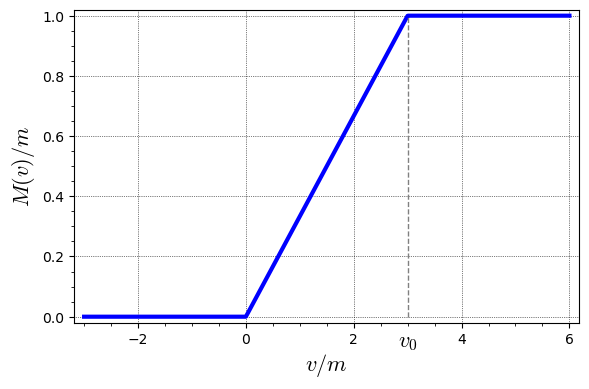

In [40]:
graph = plot(m1(v).subs({m0: 1, v0: 3}), (v,-3, 6), thickness=3,
             axes_labels=[r'$v/m$', r'$M(v)/m$'],
             frame=True, axes=False, gridlines=True)
graph += line([(3,0), (3,1)], linestyle='--', color='grey')
graph += text(r'$v_0$', (3, -0.08), color='black', fontsize=16)
graph.set_axes_range(ymin=0)
graph.save("vai_mass_function.pdf")
graph

We plug this function into the expression of $\frac{\mathrm{d}r}{\mathrm{d}t}$ found above:

In [41]:
drdt1 = drdt.substitute_function(m, m1)
drdt1

-(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 - 2*r)/(((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + v0) + 1)/v0 + 2*sgn(r + t - v0) + 2)*m0 + 2*r)

and we perform a numerical integration for $v_0 = 3 m_0$

In [42]:
drdt0 = drdt1.subs({m0: 1, v0: 3})
drdt0

-((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) - 6*r + 6*sgn(r + t - 3) + 6)/((r + t)*(sgn(r + t) + 1)*(sgn(-r - t + 3) + 1) + 6*r + 6*sgn(r + t - 3) + 6)

In [43]:
outgeods = []
tmax = 4.5
for t0 in [-10, -9, -8, -7, -6, -5, -4, -3, -2.5, -2, -1.5, -1, -0.5]:
    tmax1 = tmax if t0 < -0.8 else 1.2
    sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0, 0.01], end_points=[t0, tmax1], 
                      step=0.02)
    outgeods.append(line([[s[1],s[0]] for s in sol if s[1]>0], color='green'))

Drawing of the radiation region (yellow rays):

In [44]:
graph = Graphics()
rmax = 6
nl = 20
for i in range(nl+1):
    t0 = float(i)/float(nl)*3
    graph += line([(0, t0), (rmax, t0 - rmax)], color='yellow')

Adding the outgoing radial null geodesics:

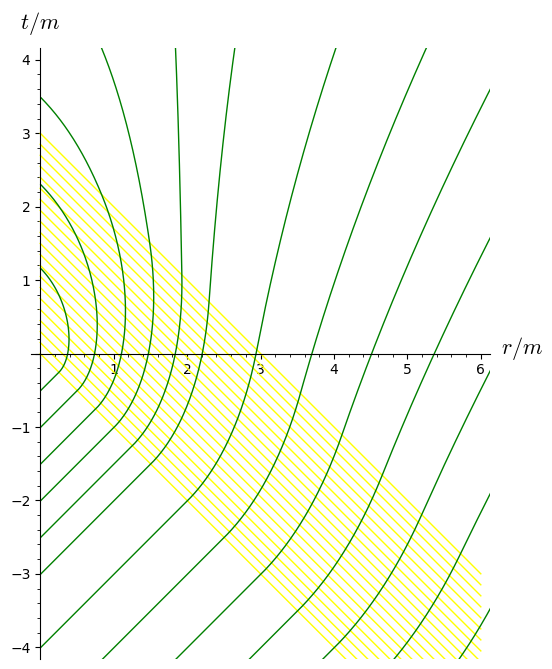

In [45]:
for geod in outgeods:
    graph += geod
show(graph, aspect_ratio=1, xmax=6, ymin=-4, ymax=4, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

The ingoing null geodesics:

In [46]:
ingeods = []
rmax = 6
for t0 in range(-6, 10):
    ingeods.append(line([(0, t0), (rmax, t0 - rmax)], color='green',
                        linestyle='--'))
for geod in ingeods:
    graph += geod

for t0 in [0.5, 1.5, 2.5]:
    graph += line([(0, t0), (rmax, t0 - rmax)], color='green',
                  linestyle='--')

The event horizon (in black):

In [47]:
t0 = -2.6
sol = desolve_rk4(drdt0, r, ivar=t, ics=[t0, 0.01], end_points=[t0, tmax], 
                  geodesicsstep=0.02)
hor = line([[s[1], s[0]] for s in sol if s[1]>0], color='black', thickness=3)
graph += hor

The trapping horizon (in red):

In [48]:
trap = line([(0, 0), (2, 1), (2, tmax)], color='red', thickness=2)
graph += trap

The curvature singularity (in orange):

In [49]:
sing = line([(0,  tmax*i/20) for i in range(21)], 
            thickness=3, color='darkorange', marker='D', markersize=8)
graph += sing

In [50]:
graph_wo_vectors = copy(graph)

The vectors $k$ and $\ell$ at some point $p$:

In [51]:
p = M((1, 4, pi/2, 0), chart=X)
l.at(p).display()

l = ∂/∂t - (m(5) - 2)/(m(5) + 2) ∂/∂r

In [52]:
graph += k.at(p).plot(ambient_coords=(r, t), color='green', fontsize=16)
graph += l.at(p).plot(ambient_coords=(r, t), color='green', fontsize=16,
                      parameters={m(5): 1}, label_offset=0.15)

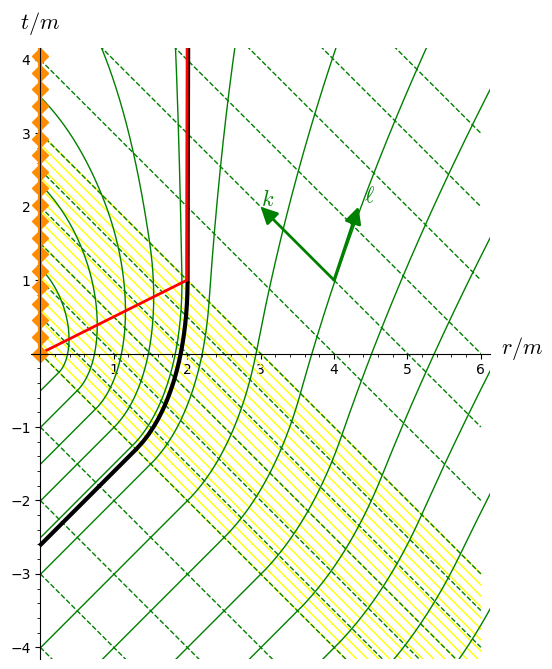

In [53]:
show(graph, aspect_ratio=1, xmax=6, ymin=-4, ymax=4, 
     axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

In [54]:
graph.save("vai_diagram.pdf", aspect_ratio=1, xmax=6, ymin=-4, 
           ymax=4, axes_labels=[r'$r/m$', r'$t/m$'], figsize=10)

A zoom on the trapping horizon in its dynamical part: notice that the "outgoing" null geodesics cross it with a vertical tangent, in agreement with the cross-sections of the trapping horizon being marginally trapped surfaces.

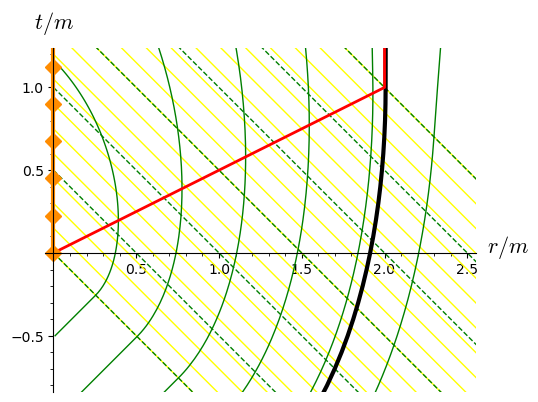

In [55]:
show(graph_wo_vectors, aspect_ratio=1, ymin=-0.8, ymax=1.2, xmax=2.5, 
     axes_labels=[r'$r/m$', r'$t/m$'])